In [1]:

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

C:\app\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [1]:
import pickle

In [2]:
with open('Word2Vec_X_data_medical_words_alpha_0.75.pkl', 'rb') as f:
    X_data = pickle.load(f)
with open('Word2Vec_y_data_medical_words_alpha_0.75.pkl', 'rb') as f:
    y_data = pickle.load(f)

In [3]:
X_data

array([[  86,   18,    4, ...,    0,    0,    0],
       [  25,   64, 3794, ...,    0,    0,    0],
       [  86,   18,   86, ...,    0,    0,    0],
       ...,
       [  34,    1,   33, ...,    0,    0,    0],
       [   2,   26,  175, ...,    0,    0,    0],
       [ 419,   91,    8, ...,    0,    0,    0]])

In [3]:
X_data.shape

(779, 22853)

In [36]:
pca = PCA(n_components=500)
X_data_PCA = pca.fit_transform(X_data)

In [37]:
with open('Word2Vec_X_data_PCA_500.pkl', 'wb') as f:
    pickle.dump(X_data_PCA, f)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [6]:
y_train

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [40]:
mask = np.random.choice([False, True], len(X_train), p=[0.9, 0.1])
X_train = X_train[mask]
y_train = y_train[mask]
mask = np.random.choice([False, True], len(X_test), p=[0.7, 0.3])
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
def plot_history(history):
    ''' A method taken from https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding that
        effectively plots the training and validation accuracy and loss data and diplays it. '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [28]:
with open('Word2Vec_embedding_matrix_colitis.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)

In [ ]:
list(embedding_matrix)

In [ ]:
vocab_size = 6454
embedding_dim = 150
maxlen = 11976
num_filters = 32

In [11]:
#Creation of the neural network with the pretrained embedding matrix.
model_with_embedding = Sequential()
model_with_embedding.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
#model_with_embedding.add(layers.GlobalMaxPool1D())
model_with_embedding.add(layers.Conv1D(num_filters, 25, activation='relu', padding='same'))
#model_with_embedding.add(MaxPooling1D(2))
#model_with_embedding.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model_with_embedding.add(layers.GlobalMaxPooling1D())
model_with_embedding.add(layers.Dense(30, activation='relu'))
#model_with_embedding.add(layers.Dense(45, activation='relu'))
model_with_embedding.add(layers.Dense(1, activation='sigmoid'))
model_with_embedding.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_with_embedding.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11976, 150)        968100    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11976, 32)         240032    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                990       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,209,153
Trainable params: 241,053
Non-trainable params: 968,100
_________________________________________________________________


In [ ]:
history = model_with_embedding.fit(X_train, y_train,
                    batch_size=1,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
THR = 0.3
for i in range(50):
    curr_history = model_with_embedding.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    verbose=1,
                    validation_data=(X_test, y_test))
    val_loss = curr_history.history['val_loss'][0]
    if val_loss < THR:
        break

In [ ]:
best_model = keras.models.load_model('word2vec_cnn_classifier_07_05_2019.h5')

In [22]:
thresh = 0.5
#y_pred = np.around(model_with_embedding.predict(X_test, batch_size=16), decimals=4)
y_pred_thresh = np.asarray([1 if y_pred[i] > thresh else 0 for i in range(len(y_pred))])

print(classification_report(y_test, y_pred_thresh))

print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77       143
           1       0.18      0.92      0.31        13

   micro avg       0.65      0.65      0.65       156
   macro avg       0.59      0.78      0.54       156
weighted avg       0.92      0.65      0.73       156

[[90 53]
 [ 1 12]]


In [18]:
np.around(y_pred, decimals=1)

array([[0. ],
       [0.2],
       [0.5],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.2],
       [0. ],
       [0.1],
       [0.1],
       [0. ],
       [0.2],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.1],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.5],
       [0.4],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.1],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
      

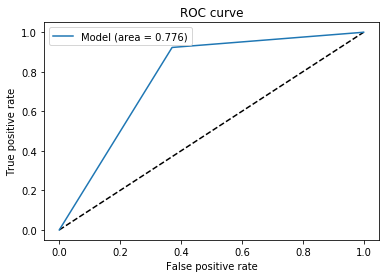

In [23]:
y_pred_keras = y_pred_thresh.ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()